# Imports.

In [47]:
import pandas as pd
import numpy as np

import secrets

import plotly.graph_objects as go
import plotly.io as pio

import matplotlib.pyplot as plt

from scipy.optimize import newton

import os

from IPython import get_ipython
from IPython.display import Image, display


from comp_econ import comp_econ as ce

# Problem 1.

## 1a. Define a function to calculate y using a for loop.

In [48]:
def y_by_loop(_alpha: np.ndarray, _sigma: np.ndarray, _x: np.ndarray, _p: np.ndarray) -> tuple:
    
    r"""
    Per the problem instructions, all inputs are supposed to be drawn from a random uniform distribution,
    and all input ndarrays must have same length.

    Parameters
    ----------
    _alpha : np.ndarray
        ndarray of scalars drawn from random uniform distribution.
    _sigma : np.ndarray
        ndarray of scalars drawn from random uniform distribution.
    _x : np.ndarray
        ndarray of scalars drawn from random uniform distribution.
    _p : np.ndarray
        ndarray of scalars drawn from random uniform distribution.

    Returns
    -------
    3-tuple
        A float y_ that is the sum of all y_i's multiplied by (1/ N), where y_i = p_i * alpha_i * (x_i ** sigma_i).

        An integer N_, the length each of the input ndarrays.

        A float loop_duration_seconds_ that is the number of seconds the function took to run.
    """

    # We are told every input ndarray is of length N, but we are not told to have N as an input parameter.
    assert _alpha.shape == _sigma.shape == _x.shape == _p.shape, "All input ndarray must have same length."
    # Since all input ndarrays are of same length, pick N = _alpha.shape[0].
    N_ = _alpha.shape[0]

    # Per the instructions, run the calculation in a loop.
    y_results_list = []
    loop_start_ts = pd.Timestamp.now()
    for i in range(0, N_):
        # rng.uniform(...) returns an array of arrays. Using .flatten() here results in a float being
        # returned instead of an ndarray.
        y_i = _p.flatten()[i] * _alpha.flatten()[i] * (_x.flatten()[i] ** _sigma.flatten()[i])
        y_results_list.append(y_i)
    loop_completion_ts = pd.Timestamp.now()

    loop_duration_seconds_ = (loop_completion_ts - loop_start_ts).total_seconds()

    # (1 / N) multiplied by the sum of all y_i's.
    y_ = (1 / N_) * sum(y_results_list)
    y_ = np.round(y_, 4)



    print(f"Successfully calculated y using a for loop, then rounded to 4 digits:\n{y_}")
    print(f"Calculation in a loop took {loop_duration_seconds_} seconds.")

    return y_, N_, loop_duration_seconds_


## 1b. Draw from random uniform distribution using seeds for reproducible results, then compute y using y_by_loop(...).

In [49]:
num_draws = int(1e4)
# num_draws = 2

# Assign seeds for reproducible results.
seed_alpha = secrets.randbits(128)
print(f"seed_alpha: {seed_alpha}")

seed_sigma = secrets.randbits(128) 
print(f"seed_sigma: {seed_sigma}")

seed_x = secrets.randbits(128)
print(f"seed_x: {seed_x}")

seed_p = secrets.randbits(128)
print(f"seed_p: {seed_p}")

print(f"Performing 4 draws of length {num_draws} from random uniform distribution.")
# rng = np.random.default_rng()
# Numpy docs for seeds of random numbers.
# https://numpy.org/doc/2.3/reference/random/index.html#random-quick-start
arr_alpha = np.random.default_rng(seed_alpha).uniform(size=(num_draws, 1))
arr_sigma = np.random.default_rng(seed_sigma).uniform(size=(num_draws, 1))
arr_x = np.random.default_rng(seed_x).uniform(size=(num_draws, 1))
arr_p = np.random.default_rng(seed_p).uniform(size=(num_draws, 1))

y_1, N, loop_duration_seconds = y_by_loop(_alpha=arr_alpha, _sigma=arr_sigma, _x=arr_x, _p=arr_p)


seed_alpha: 297092686862765216288108259505883662979
seed_sigma: 184026341647087416225805240766306404988
seed_x: 32493558107609286056695897378972066115
seed_p: 130478781648348288467292582175479009005
Performing 4 draws of length 10000 from random uniform distribution.
Successfully calculated y using a for loop, then rounded to 4 digits:
0.173
Calculation in a loop took 0.107327 seconds.


## 1c. Calculate y using only vector operations.

In [50]:
# Per the numpy documentation, the np.matrix class is no longer recommended for use. Instead, use regular arrays.
# https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
# Per the instructions, y_2 is indeed calculated in 1 line using vector operations.
vector_ops_start_ts = pd.Timestamp.now()
y_2 = np.round(((1 / N) * sum((arr_p * arr_alpha * (arr_x ** arr_sigma)))), 4)[0]
vector_ops_completion_ts = pd.Timestamp.now()
vector_ops_duration_seconds = (vector_ops_completion_ts - vector_ops_start_ts).total_seconds()

print(f"Successfully calculated y using vector operations, then rounded to 4 digits:\n{y_2}")
print(f"Vector operations took {vector_ops_duration_seconds} seconds.")


Successfully calculated y using vector operations, then rounded to 4 digits:
0.173
Vector operations took 0.006417 seconds.


## Bonus: Check in a pandas DataFrame.

In [51]:
df_problem_1 = pd.DataFrame(data={
    'y_i': [f'y_{i}' for i in range(0, N)],
    'p': arr_p.flatten(),
    'alpha': arr_alpha.flatten(),
    'x': arr_x.flatten(),
    'sigma': arr_sigma.flatten()
    }
)
df_problem_1['y_i'] = df_problem_1['y_i'].astype('string')

df_problem_1 = df_problem_1.assign(
    y_i_value = df_problem_1['p']\
        .mul(df_problem_1['alpha'], fill_value=np.nan)\
        .mul(
            (df_problem_1['x'].pow(df_problem_1['sigma'], fill_value=np.nan)),
            fill_value=np.nan
        )
)

print("df_problem_1 info and shape:")
df_problem_1.info()
print(df_problem_1.shape)

y_3 = (1 / N) * (df_problem_1['y_i_value'].sum())
y_3 = np.round(y_3, 4)
print(f"Successfully calculated y using columns in a pandas DataFrame:\n{y_3}")

df_problem_1 info and shape:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   y_i        10000 non-null  string 
 1   p          10000 non-null  float64
 2   alpha      10000 non-null  float64
 3   x          10000 non-null  float64
 4   sigma      10000 non-null  float64
 5   y_i_value  10000 non-null  float64
dtypes: float64(5), string(1)
memory usage: 468.9 KB
(10000, 6)
Successfully calculated y using columns in a pandas DataFrame:
0.173


In [52]:
# Display some sampled rows.
df_problem_1.sample(n=10)

,y_i,p,alpha,x,sigma,y_i_value
3911,y_3911,0.678487,0.513622,0.583675,0.299464,0.296594
4053,y_4053,0.680671,0.922831,0.231288,0.402645,0.348368
2444,y_2444,0.827014,0.550850,0.849525,0.497306,0.420073
8934,y_8934,0.216584,0.429533,0.526276,0.400040,0.071961
190,y_190,0.386600,0.310365,0.037858,0.945671,0.005427
7742,y_7742,0.404913,0.442478,0.172411,0.785935,0.045003
9328,y_9328,0.729879,0.724786,0.369233,0.135673,0.462120
6206,y_6206,0.027629,0.471764,0.221532,0.968656,0.003027
4789,y_4789,0.093410,0.557475,0.760956,0.918017,0.040523
1106,y_1106,0.743873,0.825052,0.897065,0.544201,0.578505


## Confirm that all 3 calculation procedures produced the same result.

In [53]:
print(f"y_1 = {y_1}")
print(f"y_2 = {y_2}")
print(f"y_3 = {y_3}")
assert y_1 == y_2 == y_3, "The calculations did not all produce the same result."

y_1 = 0.173
y_2 = 0.173
y_3 = 0.173


## 1d. Timing for loop vs vector operations. We know that vector operations are faster.

In [54]:
loop_diff_vector_seconds = np.round((loop_duration_seconds - vector_ops_duration_seconds), 4)
print(f"Calculating y in a for loop took {loop_diff_vector_seconds} seconds longer than calculating y using vector operations.")
# seconds_pct_diff is negative because vector_ops_duration_seconds < loop_duration_seconds
# ie the vector operations were faster than the loop calculations.
seconds_pct_diff = np.round(np.abs(
    ((vector_ops_duration_seconds - loop_duration_seconds) / loop_duration_seconds) * 100
    )
)
print(f"The vector operations were {seconds_pct_diff}% faster than the loop calculation.")

Calculating y in a for loop took 0.1009 seconds longer than calculating y using vector operations.
The vector operations were 94.0% faster than the loop calculation.


# Problem 2.

## 2a. We are given Equation (1), a non-linear equation for labor supply, and told to convince ourselves it is true.

## 2b. Define function F for the first order conditions and budget constraint given in Equation (1).

In [55]:
def F(_l: np.ndarray | float,
      _W: np.ndarray | float,
      _alpha: np.ndarray | float,
      _sigma: np.ndarray | float,
      _v: np.ndarray | float,
      _psi: np.ndarray | float,
      _beta: np.ndarray | float,
      _r: np.ndarray | float
    ) -> np.ndarray | float:
    """
    Non-linear labor supply equation given in Equation (1).
    """

    # The equation requires careful typing, so let's go term by term.
    term_1 = _l ** (1 - _alpha)
    term_2 = _W
    term_3 = (1 / (_l ** ((_v + _alpha) / _sigma)))
    term_4 = ((1 - _alpha) / _psi) ** (1 / _sigma)
    term_5 = 1 + (((_beta * (1 + _r)) ** (1 / _sigma)) / (1 + _r))
    
    return term_1 + term_2 - (term_3 * term_4 * term_5)


# 2c. Plot the non-linear labor supply for different values of W.

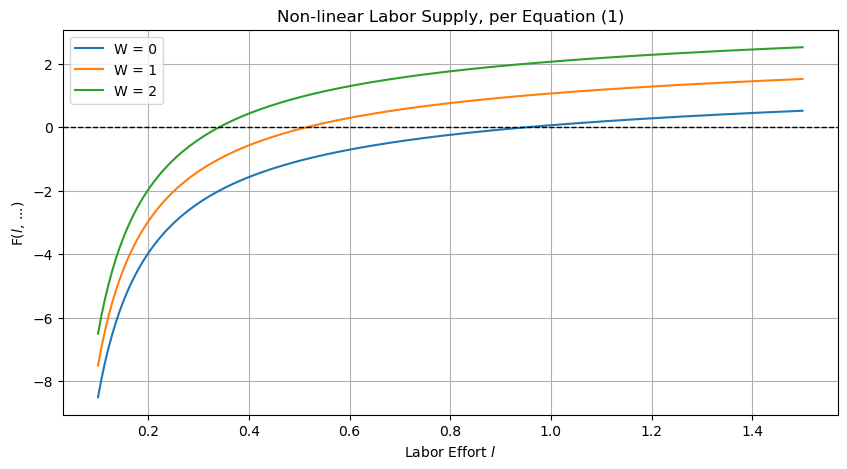

In [93]:
l = np.linspace(start=0.1, stop=1.5, num=200)
# W = 1
alpha = 0.66
v = 1.3
sigma = 2
psi = 1.5
beta = 0.98
r = 0.04

# We are told to plot 3 values of W, W = 0, 1, 2. Place these ndarrays of labor supply into a list.
labor_supply_list = [
    F(
        _l=l,
        _W=w,
        _alpha=alpha,
        _sigma=sigma,
        _v=v,
        _psi=psi,
        _beta=beta,
        _r=r
    ) for w in range(0, 3)
]

plt.figure(figsize=(10,5))
for num, ls in enumerate(labor_supply_list):
    plt.plot(l, ls, label=f'W = {num}')
plt.title("Non-linear Labor Supply, per Equation (1)")
plt.xlabel(f"Labor Effort $l$")
plt.ylabel(f"F($l$, ...)")
plt.legend()
plt.grid(True)
# Add the line y = 0.
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

## Looking back at Equation (1), the code here is the left side of the equation and the right side of the equation is zero. Thus the equilibrium for the plotted curves occurs at y=0, which I added to the plot. Of the three curves, the curve drawn by W=0 intersects the line y=0 at an x value larger than the other two curves. This tells us that the agent will work the most at W=0, and work the least at W=2. More generally, this graph tells us that an agent works less as W increases.

## 2d. We are given Equation (2), the derivative of Equation (1) with respect to _l_, and told to convince ourselves that it is true.

# 2e. Define a function to calculate labor supply using Newton's method. The result of this function should solve Equation (1).

# TODO: Check that the code for Newton's method result actually solves Equation (1).